In [1]:
# 06_integration_test.ipynb

import requests
import json

BASE_URL = "http://localhost:5000"

In [2]:
def test_prediction(text, label):
    print(f"\n--- Test: {label} ---")
    response = requests.post(
        f"{BASE_URL}/predict",
        headers={"Content-Type": "application/json"},
        data=json.dumps({"text": text})
    )
    try:
        print(json.dumps(response.json(), indent=2, ensure_ascii=False))
    except Exception as e:
        print("❌ Error parsing response:", response.text)


In [3]:
# 업그레이드된 Resume / Essay 샘플

resume_en = """Data Scientist with 5+ years of hands-on experience in Python, SQL, R, and machine learning.
Graduated with a Master’s degree in Computer Science from Stanford University.
Worked at Google where I led AI research projects including recommender systems, improving engagement by 25%.
Experienced in deep learning, NLP, TensorFlow, PyTorch, and Scikit-learn.
Skilled in Agile, GitHub, stakeholder communication, and Jira-based project management.
Used AWS and GCP cloud environments for deploying models and running data pipelines.
"""

resume_ko = """Python, SQL, R 기반 데이터 분석 및 모델링을 5년 이상 수행한 데이터 엔지니어입니다.
서울대학교 컴퓨터공학과 졸업, 석사 학위 보유.
카카오에서 4년간 AI 추천 시스템과 딥러닝 모델 개발 프로젝트를 리딩.
TensorFlow, PyTorch, Scikit-learn, 자연어 처리(NLP) 기술 보유.
AWS, GCP 기반 모델 배포 및 MLOps 환경 경험.
GitHub 기반 협업, Jira 사용 애자일 프로젝트 운영 능력 보유.
"""
essay_en = """I am passionate about solving problems using data.
Experienced in predictive modeling, NLP, and Python-based data pipelines.
Led a team project that improved text classification accuracy by 15%.
Strong in teamwork, problem solving, and communication in data-driven environments.
I aim to grow as a data scientist who delivers real value through analytics.
"""

essay_ko = """저는 데이터 기반 문제 해결에 관심이 많은 분석가입니다.
대학에서 Python과 R을 활용한 통계 분석, 머신러닝, 텍스트 마이닝 프로젝트를 수행했습니다.
Python 기반 NLP 툴을 구현하여 분류 정확도를 15% 향상시킨 경험이 있습니다.
팀 프로젝트 협업, 데이터 리포트 작성, 발표 경험도 다수 보유하고 있습니다.
AI 분석 직무에서 가치를 창출하는 데이터 분석가가 되고 싶습니다.
"""




In [4]:
# Run tests
test_prediction(resume_en, "Resume - English")
test_prediction(resume_ko, "Resume - Korean")
test_prediction(essay_en, "Essay - English")
test_prediction(essay_ko, "Essay - Korean")


--- Test: Resume - English ---
{
  "category": "Data Science",
  "char_count": 529,
  "education": [
    "Graduated with a Master’s degree in Computer Science from Stanford University."
  ],
  "experience": [
    "Data Scientist with 5+ years of hands-on experience in Python, SQL, R, and machine learning.",
    "Worked at Google where I led AI research projects including recommender systems, improving engagement by 25%.",
    "Experienced in deep learning, NLP, TensorFlow, PyTorch, and Scikit-learn.",
    "Skilled in Agile, GitHub, stakeholder communication, and Jira-based project management."
  ],
  "keywords": [
    "data",
    "learning",
    "scientist",
    "years",
    "experience"
  ],
  "lang": "en",
  "match_confidence": 65,
  "match_confidence_label": "Medium",
  "overall_score": 79,
  "positivity_label": "positive",
  "positivity_score": 87,
  "sentence_count": 6,
  "skills": [
    "project management",
    "python",
    "tensorflow",
    "ai",
    "scikit-learn",
    "mach

In [5]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"


In [6]:
from graphviz import Digraph

dot = Digraph()

dot.node('A', '입력 텍스트')
dot.node('B', '언어 감지')
dot.node('C', '번역 (if Korean)')
dot.node('D', 'BERT 감성 분석')
dot.node('E', '점수 반환 (1~5점 → 0~100)')

dot.edges(['AB', 'BC', 'CD', 'DE'])

dot.render('multilingual_flowchart', format='png', cleanup=False)

'multilingual_flowchart.png'

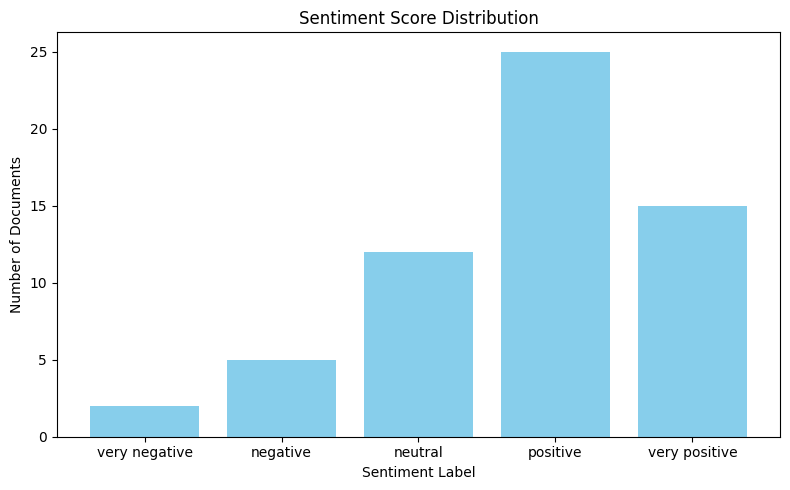

In [7]:
import matplotlib.pyplot as plt

labels = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
values = [2, 5, 12, 25, 15]  # 예시 감성 분석 결과 분포

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='skyblue')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Documents')
plt.tight_layout()
plt.savefig('sentiment_bar_chart.png')
plt.show()
